# 1.Download The Dataset

In [134]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## 2.Load The Dataset

In [135]:
df=pd.read_csv('Mall_Customers.csv')
df

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


# 3. Perfrom Below Visualization

# Univariate Analysis

C:\Users\WELCOME\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Age', ylabel='Density'>

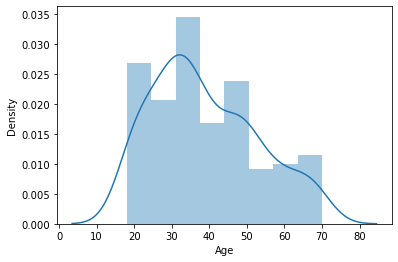

In [136]:
sns.distplot(df.Age)

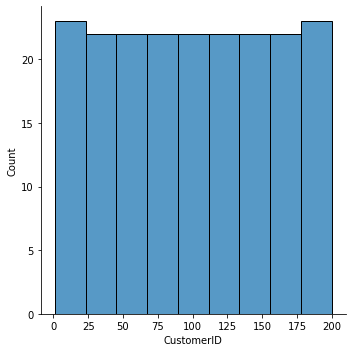

In [137]:
sns.displot(df.CustomerID)

## Bi-variate Analysis

C:\Users\WELCOME\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='CustomerID', ylabel='Age'>

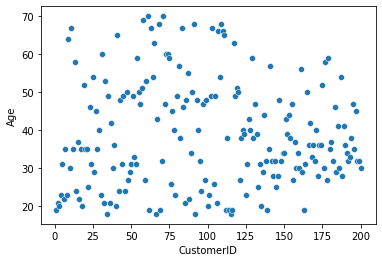

In [138]:
sns.scatterplot(df.CustomerID,df.Age)

## Multi-variate Analysis

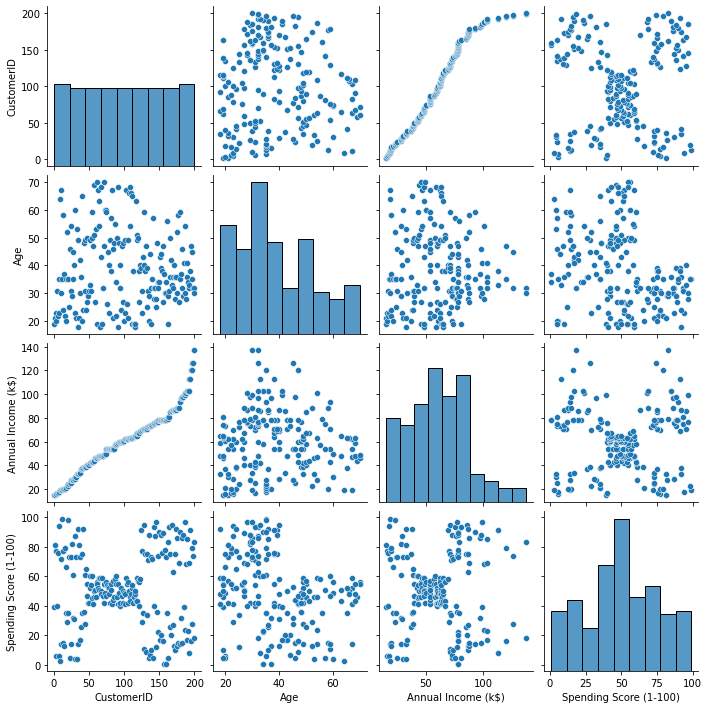

In [139]:
sns.pairplot(df)

array([[<AxesSubplot:title={'center':'CustomerID'}>,
        <AxesSubplot:title={'center':'Age'}>],
       [<AxesSubplot:title={'center':'Annual Income (k$)'}>,
        <AxesSubplot:title={'center':'Spending Score (1-100)'}>]],
      dtype=object)

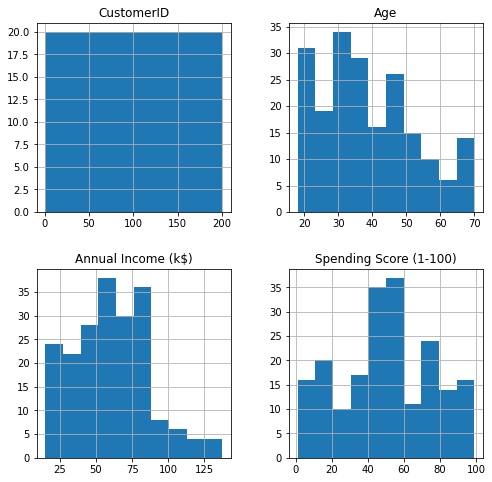

In [140]:
df.hist(figsize=(8,8))

# 4.Descriptive statistics

In [141]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [142]:
df.Gender.value_counts()

Female    112
Male       88
Name: Gender, dtype: int64

# 5.Missing Values

In [143]:
df.isnull().any()

CustomerID                False
Gender                    False
Age                       False
Annual Income (k$)        False
Spending Score (1-100)    False
dtype: bool

# 6.Finding The Outliers

C:\Users\WELCOME\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Age'>

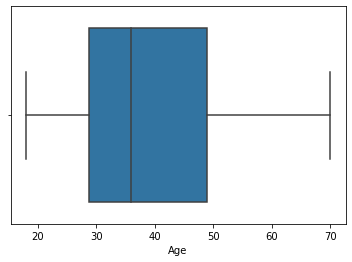

In [144]:
sns.boxplot(df.Age)

# 7. Checking Categorical Column And Perform Encoding

## 1.Label Encoding

In [145]:
from sklearn.preprocessing import LabelEncoder

In [146]:
le=LabelEncoder()

In [147]:
df.Gender=le.fit_transform(df.Gender)

In [148]:
df

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,1,19,15,39
1,2,1,21,15,81
2,3,0,20,16,6
3,4,0,23,16,77
4,5,0,31,17,40
...,...,...,...,...,...
195,196,0,35,120,79
196,197,0,45,126,28
197,198,1,32,126,74
198,199,1,32,137,18


# 2.One hot encoding

In [149]:
df_main=pd.get_dummies(df,columns=['Gender'])
df_main

,CustomerID,Age,Annual Income (k$),Spending Score (1-100),Gender_0,Gender_1
0,1,19,15,39,0,1
1,2,21,15,81,0,1
2,3,20,16,6,1,0
3,4,23,16,77,1,0
4,5,31,17,40,1,0
...,...,...,...,...,...,...
195,196,35,120,79,1,0
196,197,45,126,28,1,0
197,198,32,126,74,0,1
198,199,32,137,18,0,1


In [150]:
df_main.corr()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100),Gender_0,Gender_1
CustomerID,1.000000,-0.026763,0.977548,0.013835,-0.057400,0.057400
Age,-0.026763,1.000000,-0.012398,-0.327227,-0.060867,0.060867
Annual Income (k$),0.977548,-0.012398,1.000000,0.009903,-0.056410,0.056410
Spending Score (1-100),0.013835,-0.327227,0.009903,1.000000,0.058109,-0.058109
Gender_0,-0.057400,-0.060867,-0.056410,0.058109,1.000000,-1.000000
Gender_1,0.057400,0.060867,0.056410,-0.058109,-1.000000,1.000000


<AxesSubplot:>

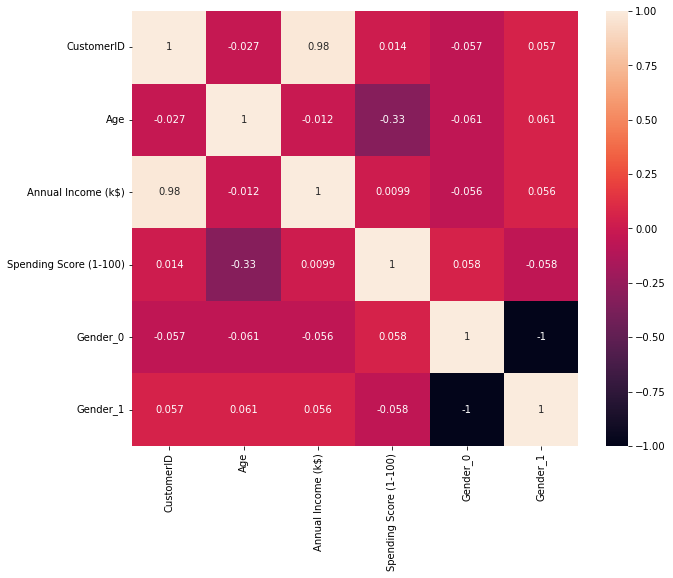

In [151]:
plt.figure(figsize=(10,8))
sns.heatmap(df_main.corr(),annot=True)

#  8. Scaling the data

In [152]:
from sklearn.preprocessing import scale

In [153]:
X=df_main.drop(columns=['Age'],axis=1)
X

,CustomerID,Annual Income (k$),Spending Score (1-100),Gender_0,Gender_1
0,1,15,39,0,1
1,2,15,81,0,1
2,3,16,6,1,0
3,4,16,77,1,0
4,5,17,40,1,0
...,...,...,...,...,...
195,196,120,79,1,0
196,197,126,28,1,0
197,198,126,74,0,1
198,199,137,18,0,1


In [154]:
X_scaled=pd.DataFrame(scale(X),columns=X.columns)
X_scaled.head()

,CustomerID,Annual Income (k$),Spending Score (1-100),Gender_0,Gender_1
0,-1.723412,-1.738999,-0.434801,-1.128152,1.128152
1,-1.706091,-1.738999,1.195704,-1.128152,1.128152
2,-1.688771,-1.700830,-1.715913,0.886405,-0.886405
3,-1.671450,-1.700830,1.040418,0.886405,-0.886405
4,-1.654129,-1.662660,-0.395980,0.886405,-0.886405


In [155]:
Y=df_main['Age']
Y

0      19
1      21
2      20
3      23
4      31
       ..
195    35
196    45
197    32
198    32
199    30
Name: Age, Length: 200, dtype: int64

# 9. Perform any of the clustering algorithms

In [156]:
from sklearn import cluster

In [157]:
error =[]
for i in range(1,11):
    kmeans=cluster.KMeans(n_clusters=i,init='k-means++',random_state=0)
    kmeans.fit(df)
    error.append(kmeans.inertia_)

C:\Users\WELCOME\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


In [158]:
error

[975512.0600000003,
 387065.71377137717,
 271384.508782868,
 195401.19855991466,
 157157.7579059829,
 122625.19813553878,
 103233.01724386725,
 86053.67444777445,
 76938.97565600359,
 69231.33607611558]

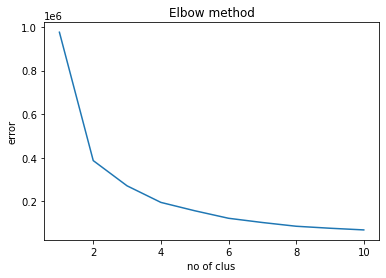

In [159]:
import matplotlib.pyplot as plt
plt.plot(range(1,11),error)
plt.title('Elbow method')
plt.xlabel('no of clus')
plt.ylabel('error')
plt.show()

# 10. Add the cluster data with the primary dataset

In [160]:
km_model=cluster.KMeans(n_clusters=3,init='k-means++',random_state=1)


In [161]:
km_model.fit(df)

KMeans(n_clusters=3, random_state=1)

In [162]:
ykmeans =km_model.predict(df)
ykmeans

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1])

In [165]:
km_model.predict([[5.1,3.5,1.4,0.2,3.1]])

C:\Users\WELCOME\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(


array([2])

In [166]:
df['kclus'] = pd.Series(ykmeans)

In [167]:
df

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),kclus
0,1,1,19,15,39,2
1,2,1,21,15,81,2
2,3,0,20,16,6,2
3,4,0,23,16,77,2
4,5,0,31,17,40,2
...,...,...,...,...,...,...
195,196,0,35,120,79,1
196,197,0,45,126,28,1
197,198,1,32,126,74,1
198,199,1,32,137,18,1


# 11. Split the Data into Dependent and Independent Variables


In [168]:
Y=df_main['CustomerID']
Y

0        1
1        2
2        3
3        4
4        5
      ... 
195    196
196    197
197    198
198    199
199    200
Name: CustomerID, Length: 200, dtype: int64

In [169]:
X=df_main.drop(columns=['CustomerID'],axis=1)
X.head()

,Age,Annual Income (k$),Spending Score (1-100),Gender_0,Gender_1
0,19,15,39,0,1
1,21,15,81,0,1
2,20,16,6,1,0
3,23,16,77,1,0
4,31,17,40,1,0


# 12. Split the data into training and testing

In [170]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X_scaled,Y,test_size=0.3,random_state=0)

In [171]:
X_train.shape

(140, 5)

In [172]:
Y_train.shape

(140,)

In [173]:
X_test.shape

(60, 5)

In [174]:
Y_test.shape

(60,)

In [175]:
from sklearn.linear_model import LinearRegression

In [176]:
Model= LinearRegression()

In [177]:
Model.fit(X_test,Y_test)

LinearRegression()

In [178]:
pred=Model.predict(X_train)
pred

array([132.,  97., 182.,  20., 154.,  93.,  55., 164.,  52.,  87., 140.,
        91., 138., 102., 145.,  90., 110.,  15.,  28., 142., 188.,  47.,
       139., 196., 109.,  63.,   3.,  60., 137., 198.,  44.,  11., 195.,
        74., 197., 179., 176., 127.,  94., 113., 159., 192.,  51.,   1.,
        95., 111.,  96.,  65., 168.,  42.,  70.,  50.,  49.,  86.,  14.,
       162.,  24., 187., 136.,  21.,  16.,  79., 105.,  53., 101.,  77.,
         4., 117., 165., 199.,   7.,  69.,  85., 122., 156., 172., 157.,
        92., 200.,  12., 120., 103.,  36.,  58.,  66.,   2., 121., 163.,
        43., 106., 133., 174.,  18.,  39., 134.,  54., 158., 129.,  35.,
        29., 115., 152.,  32., 167., 128., 177.,  33., 143., 170., 148.,
        30., 100.,  83.,  80., 116., 149., 194.,  73.,  78.,  26., 166.,
        82., 189., 175., 191.,  40.,  59., 141.,  89.,  71.,  88.,  37.,
        22.,  10., 104.,  68., 193., 118.,  48., 173.])

In [179]:
y_prediction=Model.predict(X_test)
y_prediction

array([ 19., 171., 108.,  99., 178., 183.,   6., 147.,  13., 153.,  62.,
       126., 181., 155.,  81.,   8.,  34., 131.,  38.,  75., 184., 146.,
        46., 160.,  61., 124., 180., 186., 123.,  45.,  17.,  56., 151.,
       112.,  23., 190., 130.,   5.,  84., 107., 135.,  67.,  27., 114.,
       169.,  64.,   9.,  76., 119., 144.,  72., 125., 185.,  98., 150.,
        25.,  31., 161.,  41.,  57.])

In [180]:
Age=pd.DataFrame({'Actual_y_value':y_test,'Predicted_y_value':y_prediction})

In [181]:
Age

,Actual_y_value,Predicted_y_value
18,19,19.0
170,171,171.0
107,108,108.0
98,99,99.0
177,178,178.0
182,183,183.0
5,6,6.0
146,147,147.0
12,13,13.0
152,153,153.0


# 14. Train the Model

In [182]:
from sklearn.linear_model import LinearRegression
model=LinearRegression()

In [183]:
Model.fit(X_train,Y_train)

LinearRegression()

In [184]:
train_pred=Model.predict(X_train)
train_pred

array([132.,  97., 182.,  20., 154.,  93.,  55., 164.,  52.,  87., 140.,
        91., 138., 102., 145.,  90., 110.,  15.,  28., 142., 188.,  47.,
       139., 196., 109.,  63.,   3.,  60., 137., 198.,  44.,  11., 195.,
        74., 197., 179., 176., 127.,  94., 113., 159., 192.,  51.,   1.,
        95., 111.,  96.,  65., 168.,  42.,  70.,  50.,  49.,  86.,  14.,
       162.,  24., 187., 136.,  21.,  16.,  79., 105.,  53., 101.,  77.,
         4., 117., 165., 199.,   7.,  69.,  85., 122., 156., 172., 157.,
        92., 200.,  12., 120., 103.,  36.,  58.,  66.,   2., 121., 163.,
        43., 106., 133., 174.,  18.,  39., 134.,  54., 158., 129.,  35.,
        29., 115., 152.,  32., 167., 128., 177.,  33., 143., 170., 148.,
        30., 100.,  83.,  80., 116., 149., 194.,  73.,  78.,  26., 166.,
        82., 189., 175., 191.,  40.,  59., 141.,  89.,  71.,  88.,  37.,
        22.,  10., 104.,  68., 193., 118.,  48., 173.])

# 15. Test the Model

In [185]:
from sklearn.linear_model import LinearRegression
model=LinearRegression()

In [186]:
Model.fit(X_test,Y_test)

LinearRegression()

In [187]:
test_pred=Model.predict(X_test)
test_pred

array([ 19., 171., 108.,  99., 178., 183.,   6., 147.,  13., 153.,  62.,
       126., 181., 155.,  81.,   8.,  34., 131.,  38.,  75., 184., 146.,
        46., 160.,  61., 124., 180., 186., 123.,  45.,  17.,  56., 151.,
       112.,  23., 190., 130.,   5.,  84., 107., 135.,  67.,  27., 114.,
       169.,  64.,   9.,  76., 119., 144.,  72., 125., 185.,  98., 150.,
        25.,  31., 161.,  41.,  57.])

# 16. Measure the performance using Evaluation Metrics.

In [188]:
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report,roc_curve,roc_auc_score,mean_squared_error
from sklearn.linear_model import LinearRegression

In [189]:
regression=LinearRegression()
regression.fit(X_train,Y_train)

LinearRegression()

In [190]:
Y_prediction=regression.predict(X_test)

In [191]:
cutoff=0.7
y_prediction_classes=np.zeros_like(Y_prediction)
y_prediction_classes[Y_prediction>cutoff]=1

In [192]:
y_test_classes=np.zeros_like(Y_test)
y_test_classes[Y_test>cutoff]=1

# Confusion Matrix

In [193]:
confusion_matrix(y_test_classes,y_prediction_classes)

array([[60]], dtype=int64)

In [194]:
pd.crosstab(y_test_classes,y_prediction_classes)

col_0,1.0
row_0,
1,60


# Roc-auc Score

In [195]:
accuracy_score(y_test_classes,y_prediction_classes)

1.0

## Mean Squared Error(MSE)

In [196]:
print(mean_squared_error(y_test,y_prediction))

1.5516368098427155e-27


## Classification Report

In [197]:
print(classification_report(y_test_classes,y_prediction_classes))

              precision    recall  f1-score   support

           1       1.00      1.00      1.00        60

    accuracy                           1.00        60
   macro avg       1.00      1.00      1.00        60
weighted avg       1.00      1.00      1.00        60

